## Data Exploration

In this notebook, we are going to take a closer look at the data.

In [8]:
import librosa
import pandas as pd
import numpy as np
from IPython.lib.display import Audio
from matplotlib import pyplot as plt
import multiprocessing
import scipy.signal
from scipy import signal
import librosa

In [5]:
from glob import glob

audio_file_list = glob('data/audio/*.ogg')

In [6]:
len(audio_file_list)

250000

There are 250_000 audio files in the `audio` directory, they are all in the `ogg` format.

In [16]:
x, SAMPLE_RATE = librosa.core.load(audio_file_list[0], sr=None)

In [17]:
SAMPLE_RATE

44100

In [13]:
x.shape[0] /44100

5.0

All the files are all 5-second long clips recorded at 44.1 kHz.

The files are unlabeled, they can work well as background sounds or can be leveraged for unsupervised pretraining.

Let us listen to a couple of these files to get a better feel for the type of sounds one can encounter in this dataset.

In [23]:
for _ in range(5):
    display(Audio(np.random.choice(audio_file_list)))

Let us also take a look at spectrograms for a couple of examples.

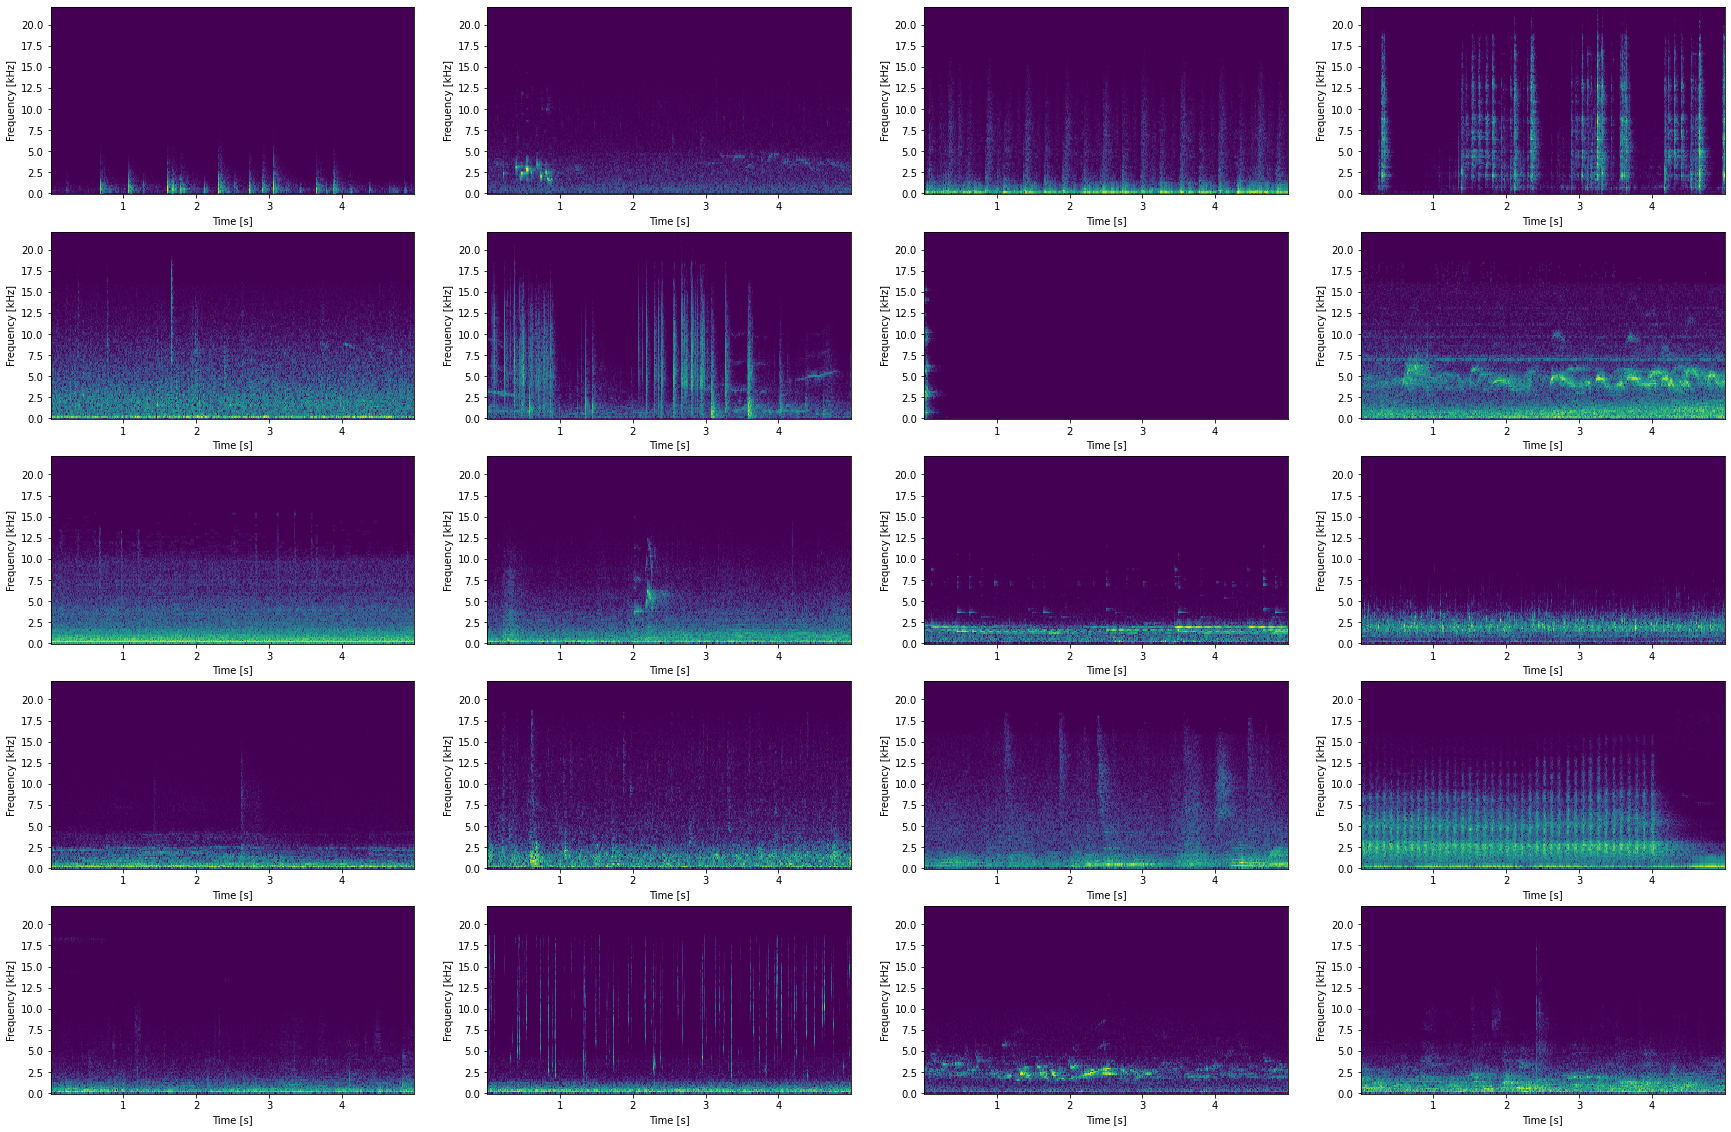

In [33]:
fig, subplots = plt.subplots(5,4, figsize=(30,20))
    
for ax in subplots.flat:
    audio, _ = librosa.core.load(np.random.choice(audio_file_list), sr=None)
    freqs, times, Sx = signal.spectrogram(audio, fs=SAMPLE_RATE)
    ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx+1e-9), cmap='viridis', shading='auto')
    ax.set_ylabel('Frequency [kHz]')
    ax.set_xlabel('Time [s]');